In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Microsoft_Stock.csv")

In [ ]:
Using pandas profile report to know about data:

In [4]:
report=pp.ProfileReport(df,title = "Pandas Profile Report")
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
df.shape

(1511, 6)

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


Since we are working with time series, the most essential features are the time related feature. So , we will convert dataime to index In this example, we have the column DateTime which uniquely identifies a day and Time .This column is provided in string format. So we will convert it to the datetime64[ns] data type.

In [10]:
df.shape

(1511, 6)

In [12]:
df.set_index("Date",inplace=True)

In [13]:
df

,Open,High,Low,Close,Volume
Date,,,,,
4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...
3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455


In [14]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [15]:
df.describe()

,Open,High,Low,Close,Volume
count,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,107.385976,108.437472,106.294533,107.422091,3.019863e+07
std,56.691333,57.382276,55.977155,56.702299,1.425266e+07
min,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,245.030000,246.130000,242.920000,244.990000,1.352271e+08


## Data Visualization

Let's draw a chart showing how volume , high and low prices hanges over time.

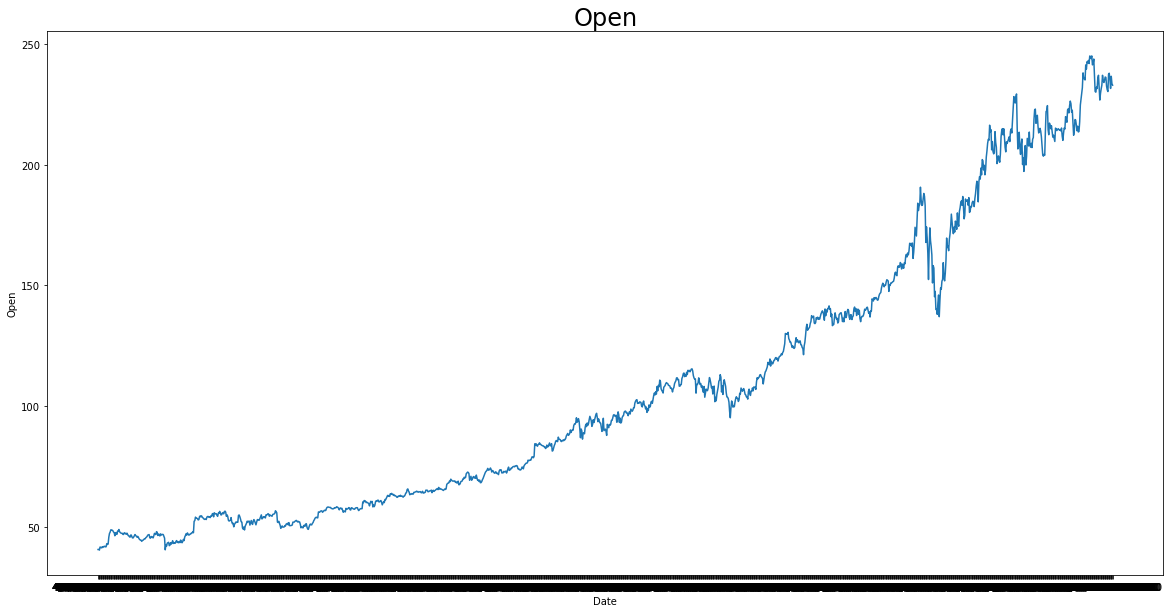

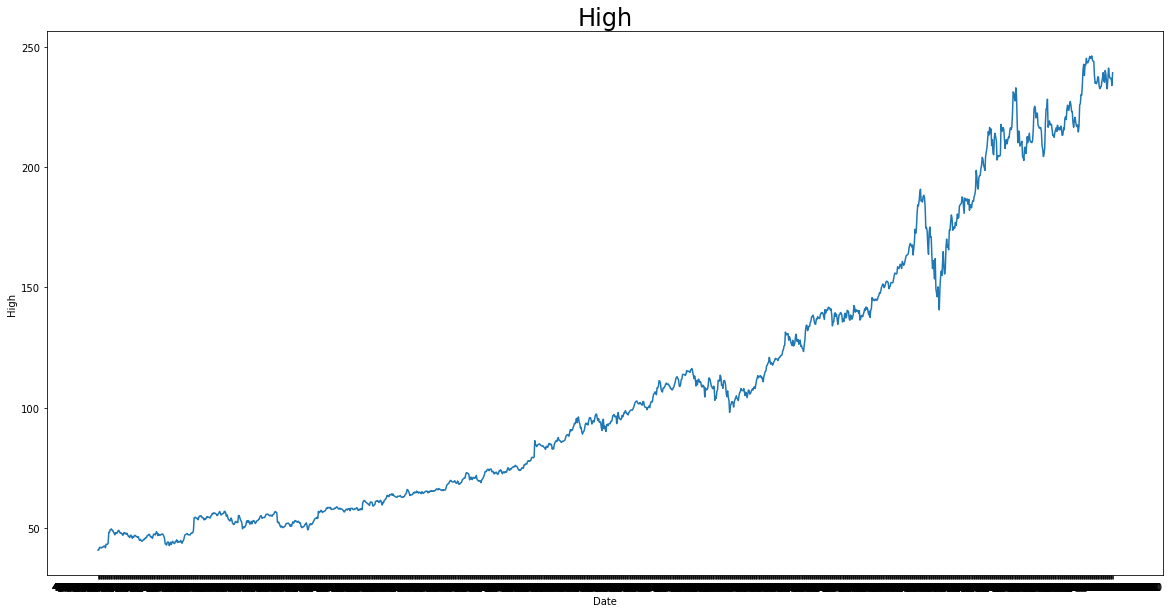

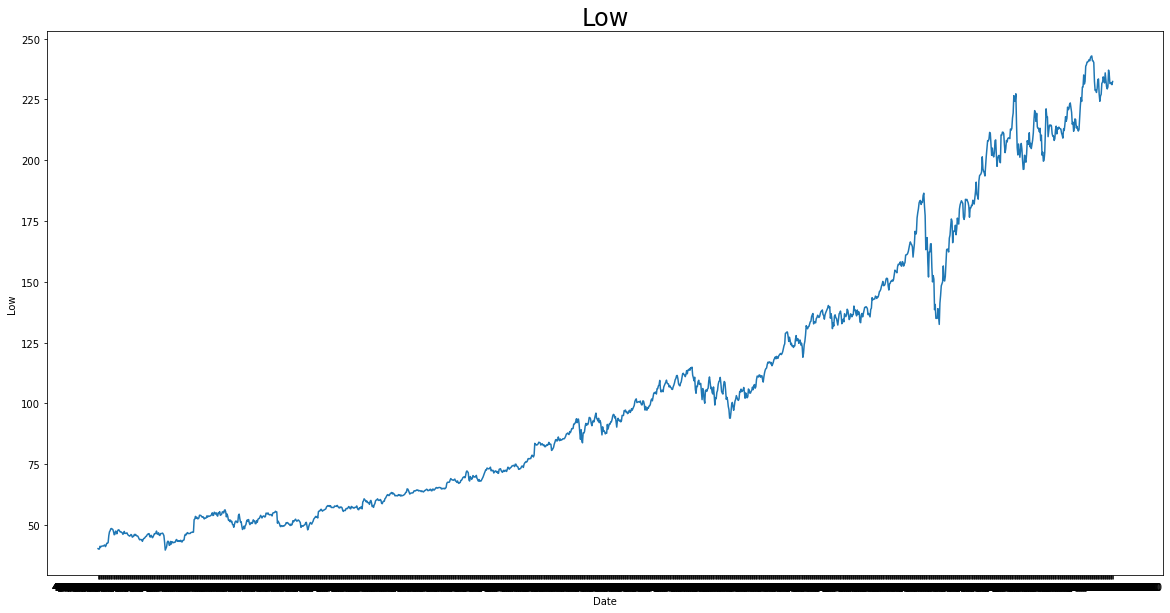

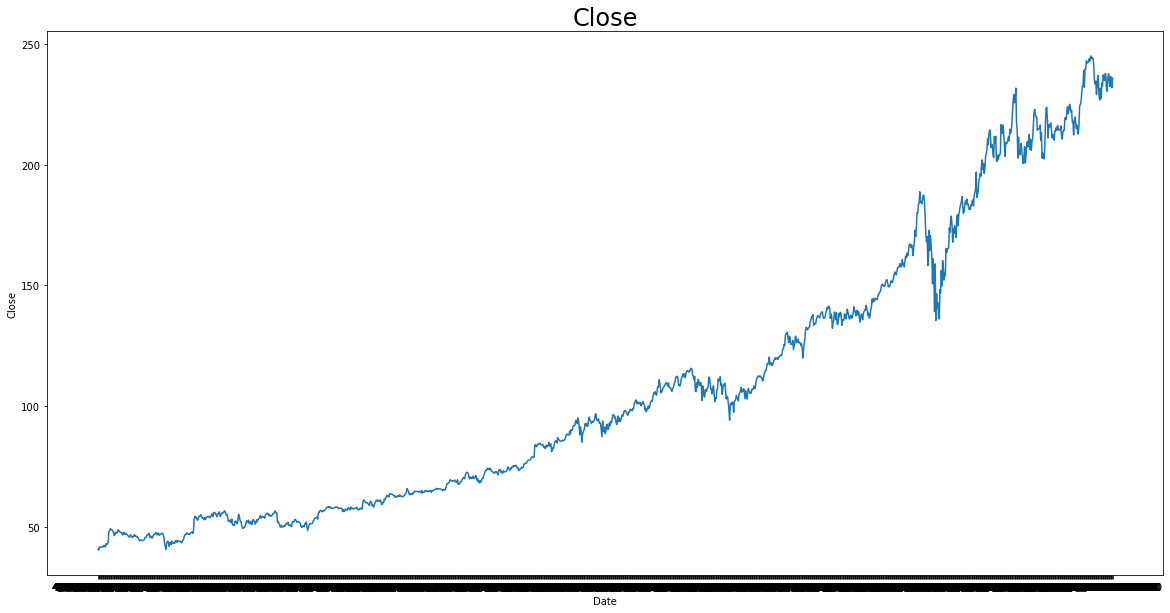

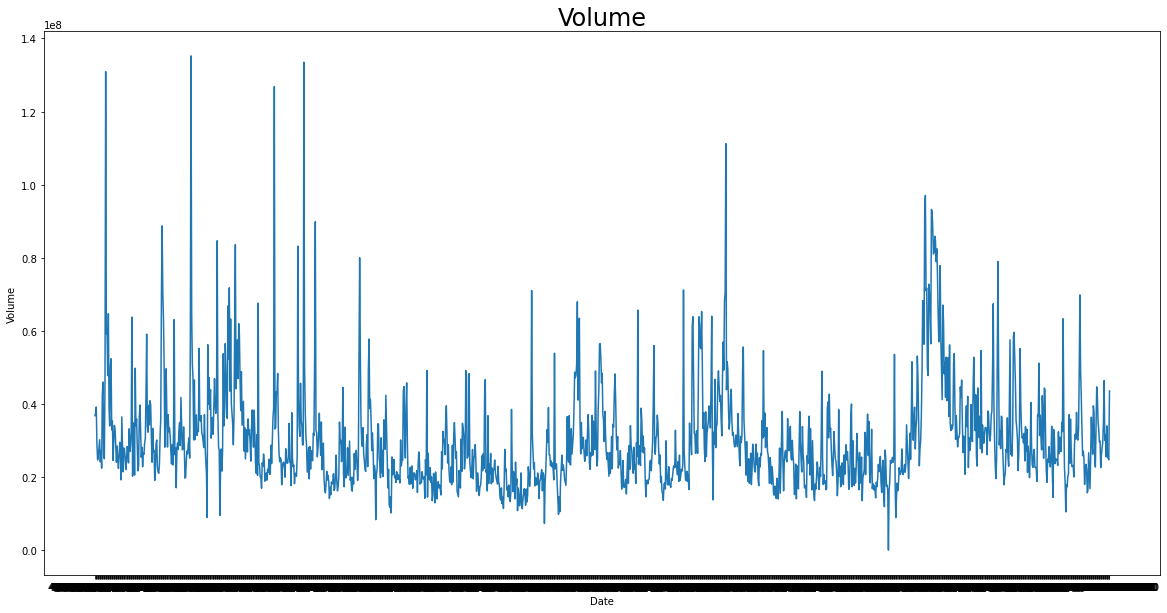

In [18]:
for col in df.columns:
    plt.figure(figsize=(20,10))
    sns.lineplot(x = df.index ,y = df[col],data = df)
    plt.title(col , fontsize=24)
    plt.show()

It’s clear from the plots that there is an overall increase in the trend,with some seasonality in Volume plot

## STATIONARITY

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time. This is done basically because if you take a certain behavior over time, it is important that this behavior is same in the future in order for us to forecast the series. There are a lot of statistical theories to explore stationary series than non-stationary series.

In practice we can assume the series to be stationary if it has constant statistical properties over time and these properties can be:

• constant mean

• constant variance

• an auto co-variance that does not depend on time.

like we did earlier

Plotting Rolling Statistics :The function will plot the moving mean or moving Standard Deviation. 
This is still visual method. 

Also ,There are multiple implementations of Unit Root tests like:

Augmented Dickey Fuller test (ADH Test)

Kwiatkowski-Phillips-Schmidt-Shin – KPSS test (trend stationary)

Philips Perron test (PP Test)

The most commonly used is the Dickey-fuller Test :This is one of the statistical tests for checking stationarity. First we consider the null hypothesis: the time series is non- stationary. The result from the rest will contain the test statistic and critical value for different confidence levels. The idea is to have Test statistics less than critical value, in this case we can reject the null hypothesis and say that this Time series is indeed stationary

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window = 10).mean()
    MSTD = timeseries.rolling(window = 10).std()

    #Plot rolling statistics:
    plt.figure(figsize=(20,10))
    orig = plt.plot(timeseries, color='pink',label='Original')
    mean = plt.plot(MA, color='b', label='Rolling Mean')
    std = plt.plot(MSTD, color='g', label = 'Rolling Std')
    plt.title('Rolling Mean & Standard Deviation')
    plt.legend(loc='best')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfout = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfout['Critical Value (%s)'%key] = value
    print(dfout)

### Checking Stationarity in volume feature:

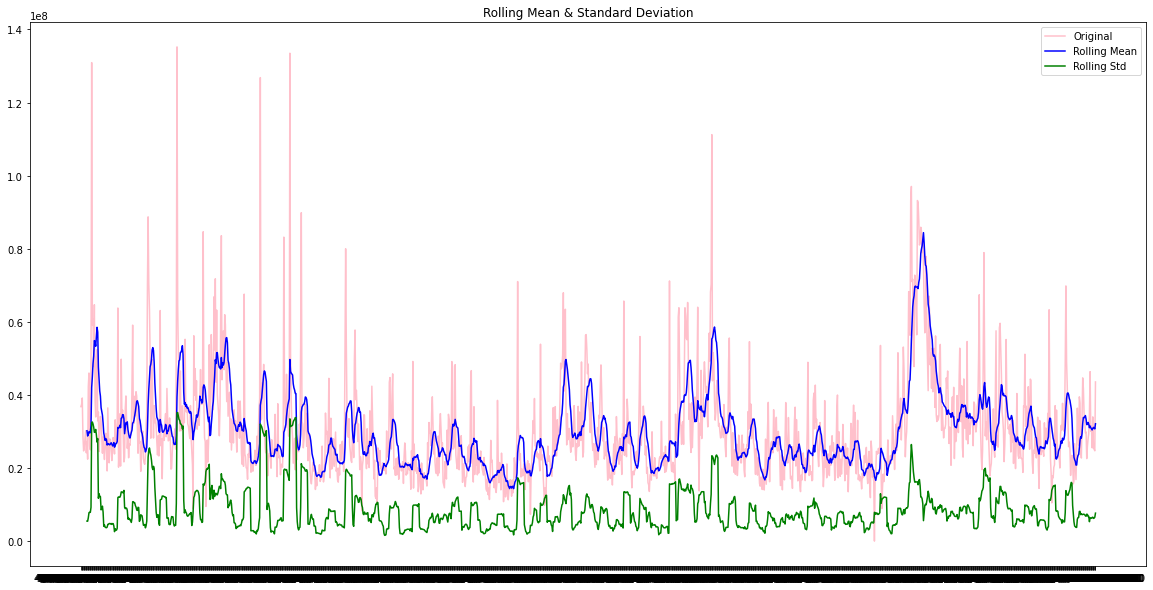

Results of Dickey-Fuller Test:
Test Statistic                -6.899656e+00
p-value                        1.291812e-09
#Lags Used                     8.000000e+00
Number of Observations Used    1.502000e+03
Critical Value (1%)           -3.434711e+00
Critical Value (5%)           -2.863466e+00
Critical Value (10%)          -2.567795e+00
dtype: float64


In [21]:
test_stationarity(df['Volume'])

Observations:
    
1. p value is  <= 0.05 , that means data is stationary.
2. Number of lags used to here is 8.

### Checking Stationarity in open feature:

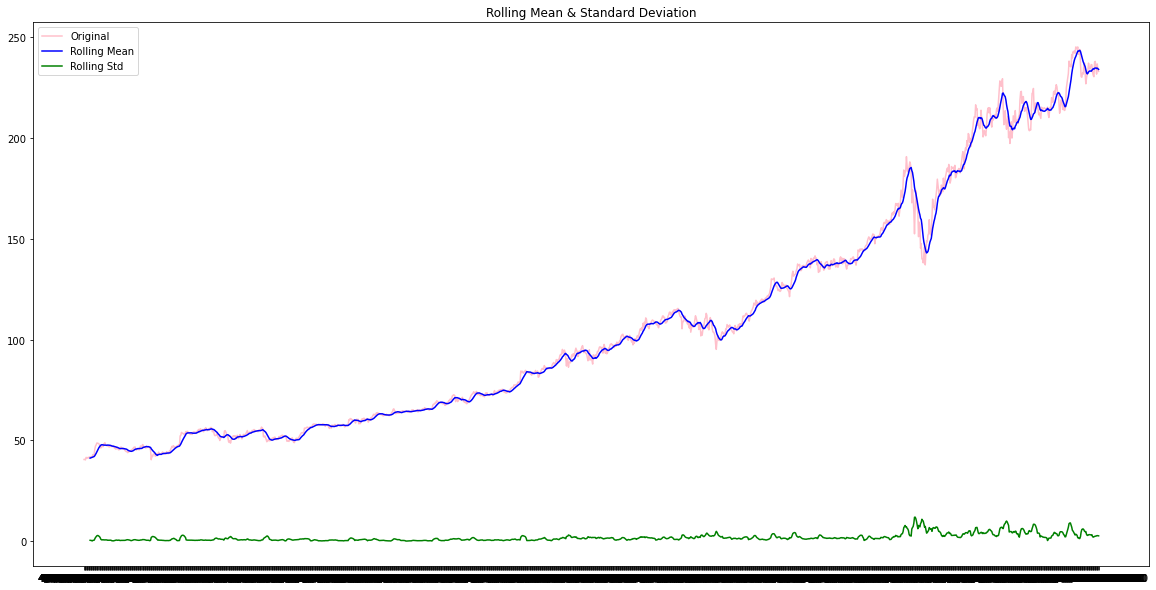

Results of Dickey-Fuller Test:
Test Statistic                    0.823915
p-value                           0.992013
#Lags Used                        2.000000
Number of Observations Used    1508.000000
Critical Value (1%)              -3.434694
Critical Value (5%)              -2.863459
Critical Value (10%)             -2.567791
dtype: float64


In [23]:
test_stationarity(df['Open'])

In [ ]:
Observations:
1. p-value is gretaer than 0.05, that means this time series has a unit root and it is non stationary.
2. Here number of lags used are 2.

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 4/1/2015 16:00:00 to 3/31/2021 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1+ KB


This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.

• Note: the signed values are compared and the absolute values.

## Transformation

There are two major factors that make a time series non-stationary. They are:

• Trend: non-constant mean

• Seasonality: Variation at specific time-frames

## Trend

The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc . Basically it penalizes larger values more than the smaller. In this case we will use the logarithmic transformation.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1511 entries, 4/1/2015 16:00:00 to 3/31/2021 16:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1511 non-null   float64
 1   High    1511 non-null   float64
 2   Low     1511 non-null   float64
 3   Close   1511 non-null   float64
 4   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 103.1+ KB


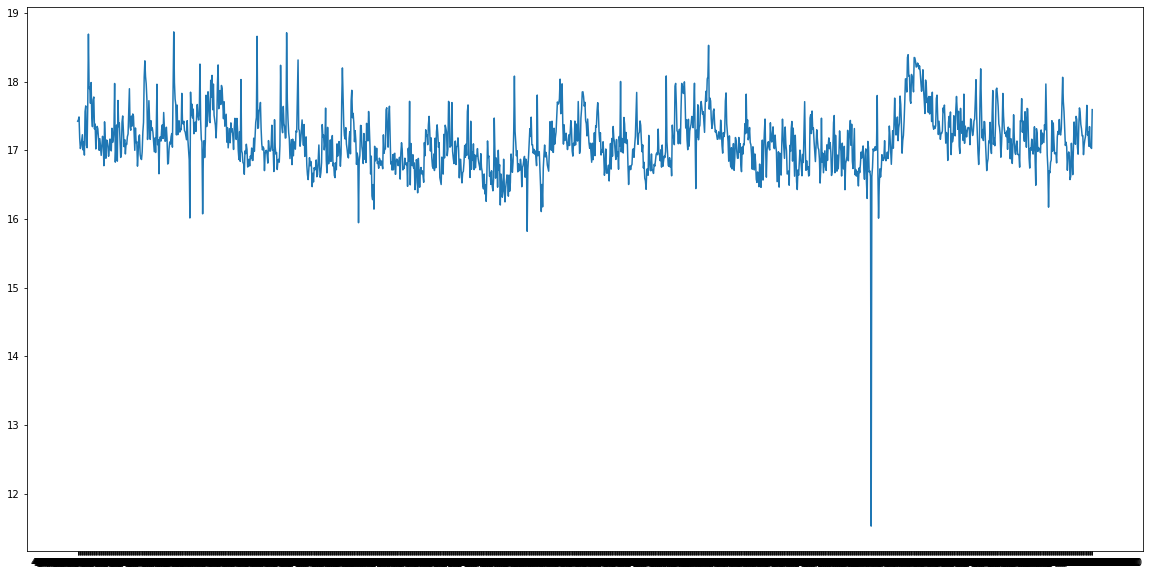

In [28]:
import numpy as np

plt.figure(figsize=(20,10))
ts_log=np.log(df['Volume'])
plt.plot(ts_log)

Observations: 

There is some noise in realizing the forward trend here. There are some methods to model these trends and then remove them from the series. Some of the common ones are:

• Smoothing: using rolling/moving average

• Aggression: by taking the mean for a certain time period (year/month)

## Smoothing

Smoothening of a time series may be useful in:

1. Reducing the effect of noise in a signal get a fair approximation of the noise-filtered series.

2. The smoothed version of series can be used as a feature to explain the original series itself.

3. Visualize the underlying trend better


So how to smoothen a series?

 1.  Take a moving average
   
   Do a LOESS smoothing (Localized Regression)
   
   Do a LOWESS smoothing (Locally Weighted Regression)

   Moving average is nothing but the average of a rolling window of defined width. But you must choose the window-width wisely, because, large window-size will over-smooth the series. 
   
   For example, a window-size equal to the seasonal duration (ex: 12 for a month-wise series), will effectively nullify the seasonal effect.

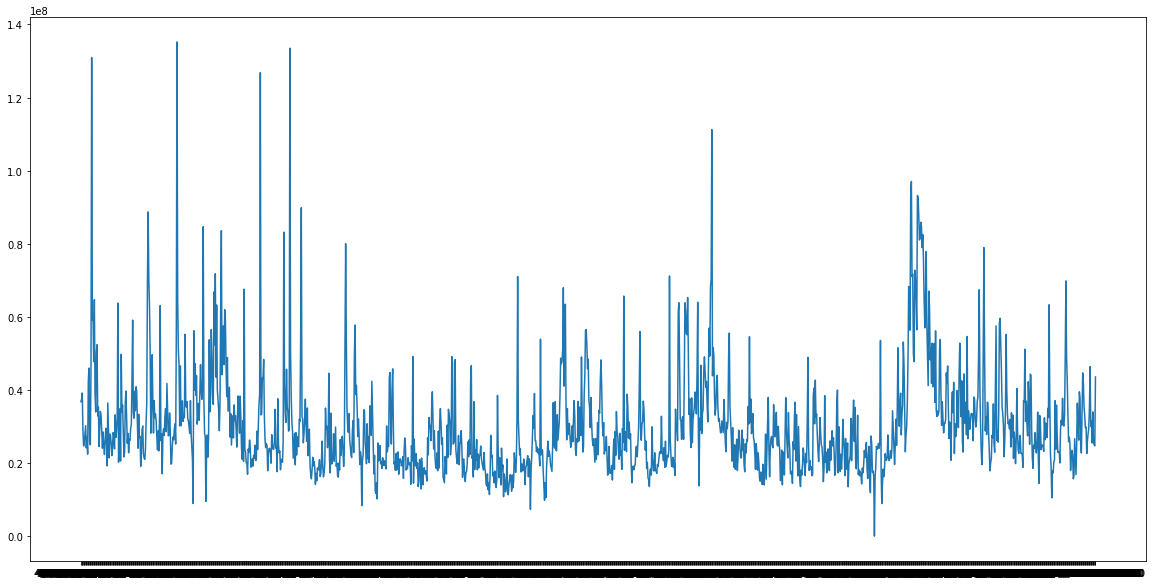

In [30]:
plt.figure( figsize=(20,10) )
plt.plot(df['Volume'])

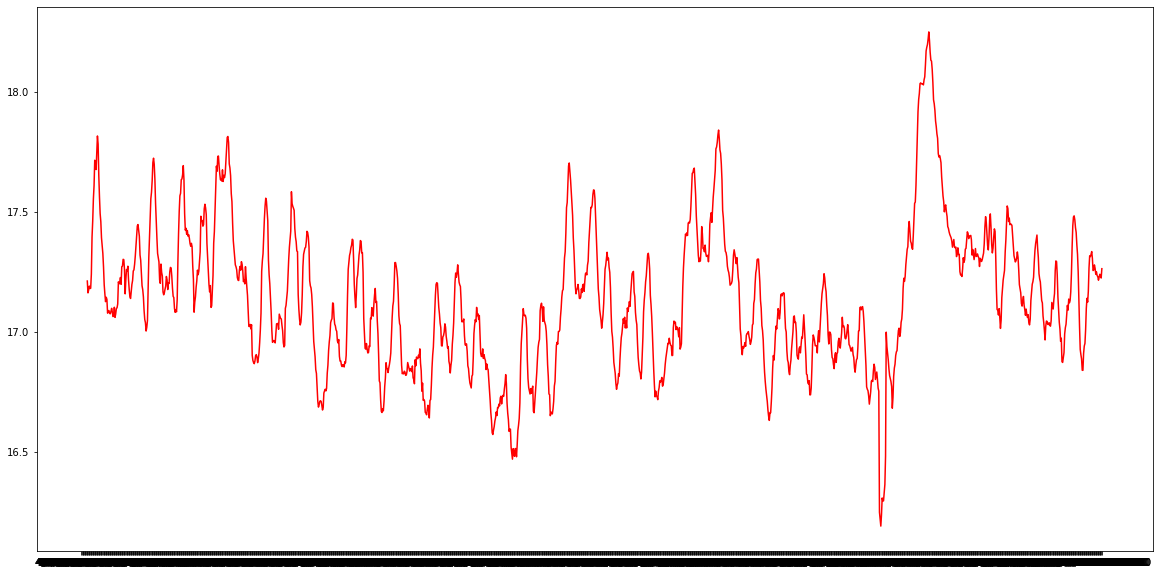

In [31]:
plt.figure(figsize=(20,10))
moving_averge=ts_log.rolling(window = 10).mean()
plt.plot(moving_averge , color='red')

Now subtract the rolling mean from the original series.

In [32]:
moving_avg_diff= ts_log-moving_averge
moving_avg_diff

Date
4/1/2015 16:00:00          NaN
4/2/2015 16:00:00          NaN
4/6/2015 16:00:00          NaN
4/7/2015 16:00:00          NaN
4/8/2015 16:00:00          NaN
                        ...   
3/25/2021 16:00:00    0.115931
3/26/2021 16:00:00   -0.186116
3/29/2021 16:00:00   -0.192891
3/30/2021 16:00:00   -0.197805
3/31/2021 16:00:00    0.328359
Name: Volume, Length: 1511, dtype: float64

In [33]:
moving_avg_diff.dropna(inplace=True)
moving_avg_diff

Date
4/15/2015 16:00:00   -0.087286
4/16/2015 16:00:00   -0.232491
4/17/2015 16:00:00    0.388136
4/20/2015 16:00:00    0.455114
4/21/2015 16:00:00   -0.105945
                        ...   
3/25/2021 16:00:00    0.115931
3/26/2021 16:00:00   -0.186116
3/29/2021 16:00:00   -0.192891
3/30/2021 16:00:00   -0.197805
3/31/2021 16:00:00    0.328359
Name: Volume, Length: 1502, dtype: float64

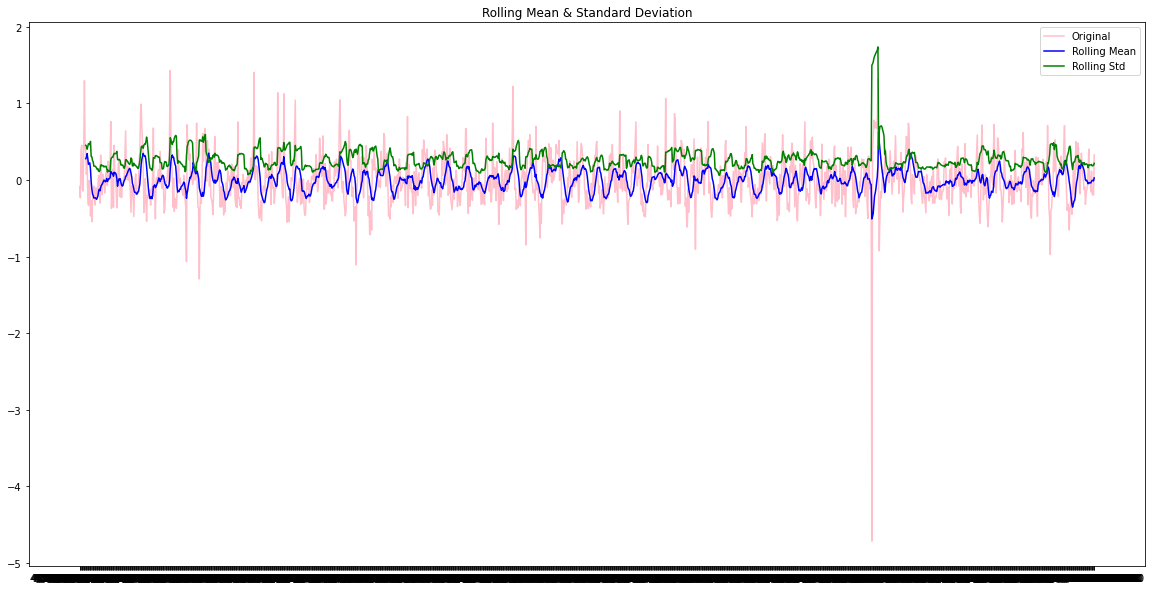

Results of Dickey-Fuller Test:
Test Statistic                -1.222250e+01
p-value                        1.099157e-22
#Lags Used                     2.000000e+01
Number of Observations Used    1.481000e+03
Critical Value (1%)           -3.434773e+00
Critical Value (5%)           -2.863494e+00
Critical Value (10%)          -2.567810e+00
dtype: float64


In [34]:
test_stationarity(moving_avg_diff)

Observation:
1. After smoothening, data is stationary.

## Seasonality (along with Trend)

Previously we saw just trend part of the time series, now we will see both trend and seasonality. Most Time series have trends along with seasonality. There are two common methods to remove trend and seasonality, they are:

• Differencing: by taking difference using time lag

• Decomposition: model both trend and seasonality, then remove them

Differencing:

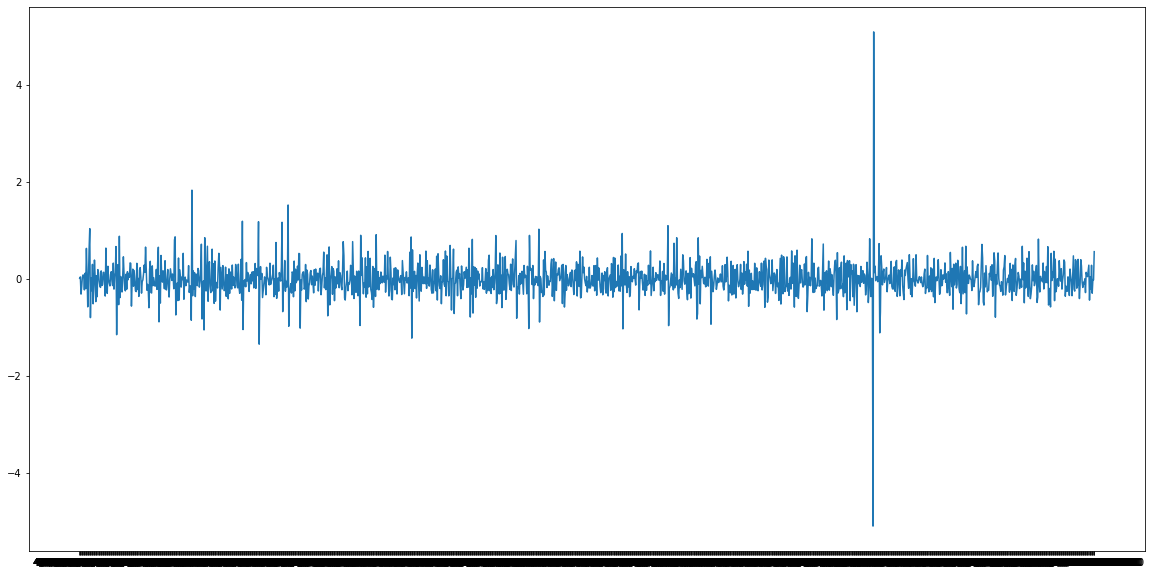

In [35]:
plt.figure(figsize=(20,10))
ts_log_diff=ts_log-ts_log.shift()
plt.plot(ts_log_diff)

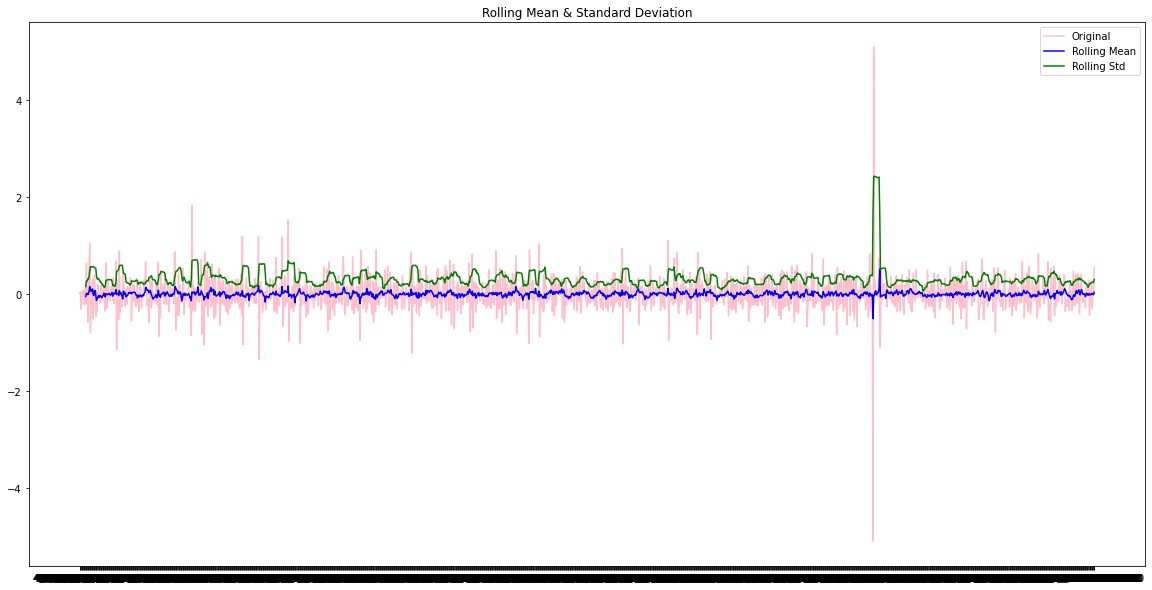

Results of Dickey-Fuller Test:
Test Statistic                -1.277553e+01
p-value                        7.608278e-24
#Lags Used                     2.400000e+01
Number of Observations Used    1.485000e+03
Critical Value (1%)           -3.434761e+00
Critical Value (5%)           -2.863488e+00
Critical Value (10%)          -2.567807e+00
dtype: float64


In [36]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [ ]:
Observations:
1. Now p value is <= 0.05, hence time series is stationary after smoothening.        

## Modelling

### Acf

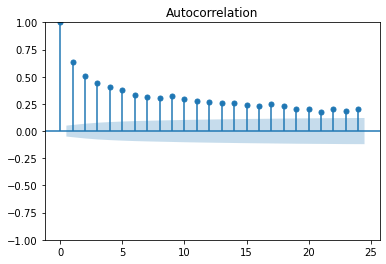

<Figure size 1440x720 with 0 Axes>

In [37]:
from statsmodels.graphics import tsaplots
# Display the autocorrelation plot of your time series
tsaplots.plot_acf(df['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

Use the autocorrelation function (ACF) to identify which lags have significant correlations, understand the patterns and properties of the time series, and then use that information to model the time series data. From the ACF, you can assess the randomness and stationarity of a time series. You can also determine whether trends and seasonal patterns are present.

In an ACF plot, each bar represents the size and direction of the correlation. Bars that extend across the red line are statistically significant.

### Pacf

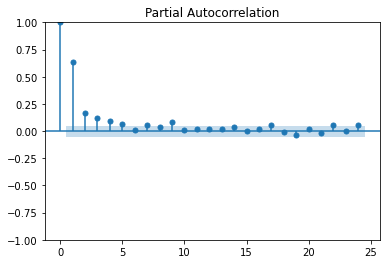

<Figure size 1440x720 with 0 Axes>

In [38]:
tsaplots.plot_pacf(df['Volume'], lags=24 )
plt.figure(figsize=(20,10))
plt.show()

The partial autocorrelation function is similar to the ACF except that it displays only the correlation between two observations that the shorter lags between those observations do not explain. For example, the partial autocorrelation for lag 3 is only the correlation that lags 1 and 2 do not explain. In other words, the partial correlation for each lag is the unique correlation between those two observations after partialling out the intervening correlations.

# ARIMA

Auto Regressive Integrated Moving Average(ARIMA) — It is like a liner regression equation where the predictors depend on parameters (p,d,q) of the ARIMA model .

Let's explain these dependent parameters:

• p : This is the number of AR (Auto-Regressive) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• q : This is the number of MA (Moving-Average) terms . Example — if p is 3 the predictor for y(t) will be y(t-1),y(t-2),y(t-3).

• d :This is the number of differences or the number of non-seasonal differences .

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Volume   No. Observations:                 1511
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -26585.774
Date:                Thu, 05 Jan 2023   AIC                          53179.547
Time:                        16:36:52   BIC                          53200.827
Sample:                             0   HQIC                         53187.472
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6208      0.060     10.362      0.000       0.503       0.738
ma.L1         -1.1367      0.065    -17.361      0.000      -1.265      -1.008
ma.L2          0.1874      0.055      3.384      0.0

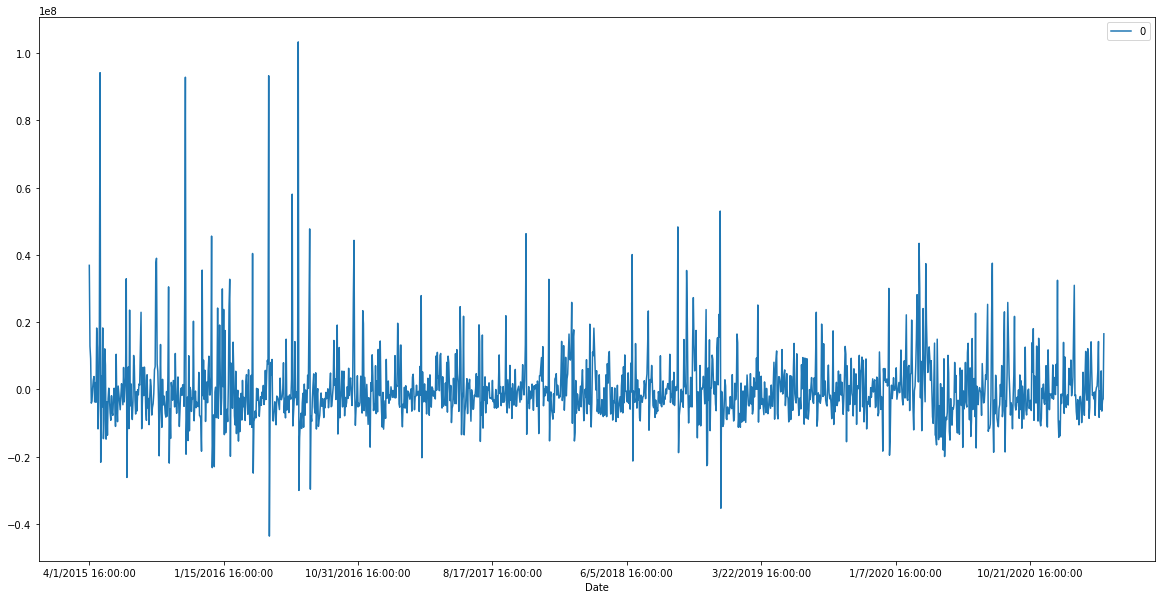

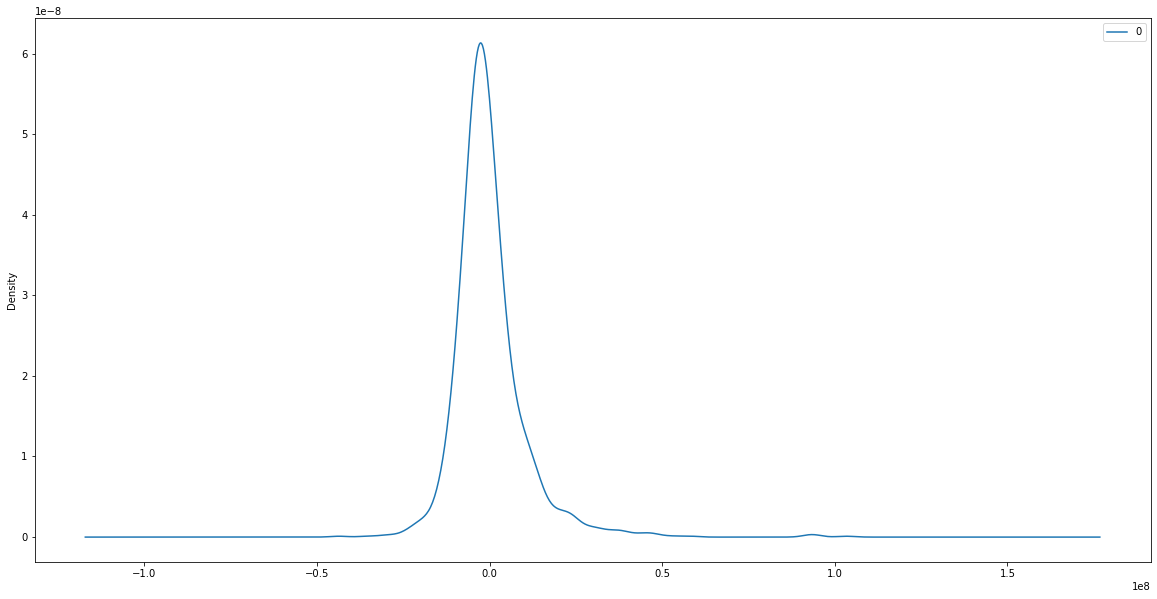

                  0
count  1.511000e+03
mean   5.605306e+04
std    1.075570e+07
min   -4.362672e+07
25%   -5.315695e+06
50%   -1.731173e+06
75%    3.282732e+06
max    1.032959e+08


In [39]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Volume'],order = (1,1,2))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(20,10))
plt.show()
residuals.plot(kind='kde',figsize=(20,10))
plt.show()
print (residuals.describe())

<AxesSubplot:xlabel='Date'>

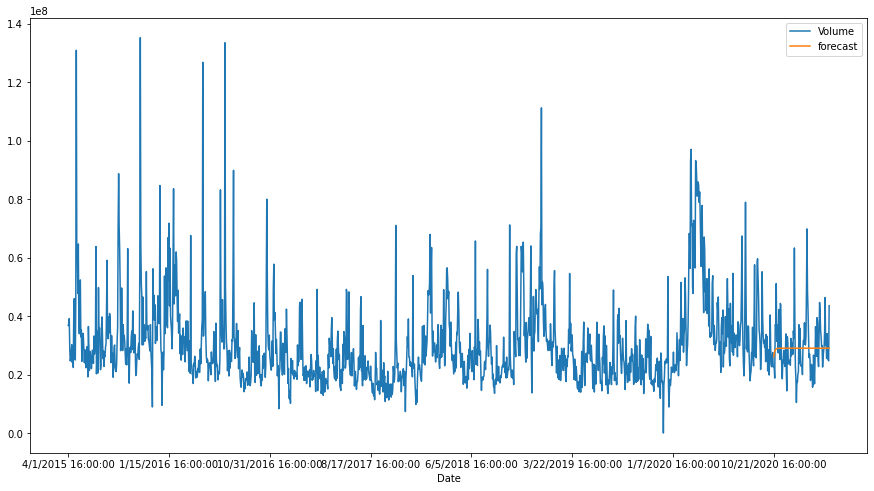

In [61]:
results=model.fit()
df['forecast']=results.predict(start=1400,end=1510,dynamic=True)
df[['Volume','forecast']].plot(figsize=(15,8))

# Dataset Summary

1. First we checked the stationary in different features of the time series dataset.
2. Observed the positive trend and seasonality in the dataset, removed it using smoothening techniques.
3. Made sure that the time series is stationary.
4. As there was seasonality in the dataset, so we fitted the model using SARIMAX model as it uses seasonal difference of 12 during fitting the model.
5. Used pacf plot for finding value of p(AR) i.e 1 and used acf plot to find value of q(MA) i.e 2 and after seasonal swift value d(first difference) was 1. Hence, Order of ARIMA model is (1,1,2)